In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = "/content/Training data.xlsx"
data = pd.read_excel(path)
data


,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88
...,...,...,...,...,...,...,...,...,...
995,yes,M,2,1,1,9,18,108,64.12
996,no,M,1,2,2,2,19,109,75.47
997,yes,M,2,2,1,5,17,123,76.73
998,yes,F,1,3,3,8,17,104,69.07


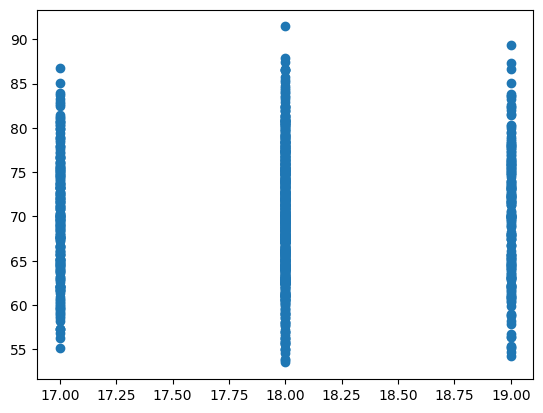

In [11]:
x_train = np.array(data.iloc[:,0:8])
df_x = pd.DataFrame(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
x_f1 = np.array(data.iloc[:,6])
plt.scatter(x_f1, y_train)


In [12]:
# for encoding non numeric feature i'll import sklearn lib
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column

def feature_changing(df_x):
  for col in df_x.columns:
    if df_x[col].dtype == 'object':  # Check if the column is categorical
        df_x[col] = label_encoder.fit_transform(data[col])
  return df_x
df_x = feature_changing(df_x)
print(df_x)

def feature_changing(x_train):
  x_train = np.array(df_x.iloc[:,0:8])
  return x_train

x_train = feature_changing(x_train)
print(x_train)


     internet  sex  traveltime  studytime  freetime  absences  age   iq
0           0    1           2          2         5         6   18  118
1           1    1           2          2         2         7   19  107
2           1    1           3          3         3         5   18  108
3           0    0           3          3         4         9   17  100
4           1    1           1          4         3         4   19   96
..        ...  ...         ...        ...       ...       ...  ...  ...
995         1    1           2          1         1         9   18  108
996         0    1           1          2         2         2   19  109
997         1    1           2          2         1         5   17  123
998         1    0           1          3         3         8   17  104
999         1    1           1          2         2         6   18  128

[1000 rows x 8 columns]
[[  0   1   2 ...   6  18 118]
 [  1   1   2 ...   7  19 107]
 [  1   1   3 ...   5  18 108]
 ...
 [  1   1   2

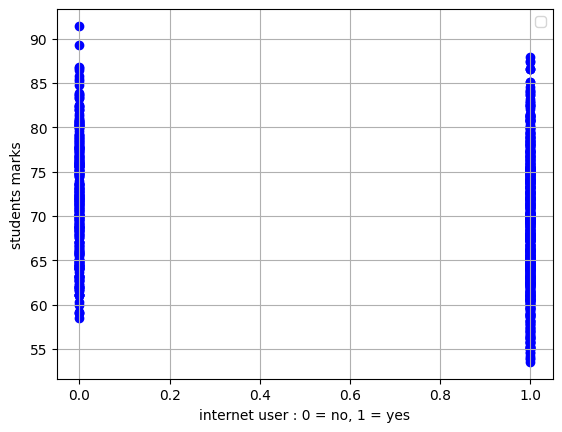

In [13]:
plt.scatter(x_train[:, 0], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'internet user : 0 = no, 1 = yes')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()


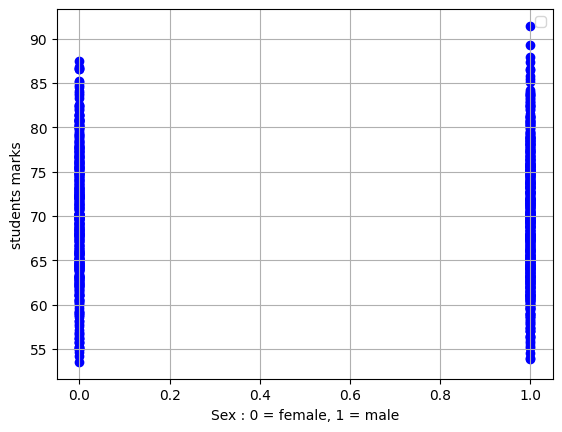

In [14]:
plt.scatter(x_train[:, 1], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'Sex : 0 = female, 1 = male')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

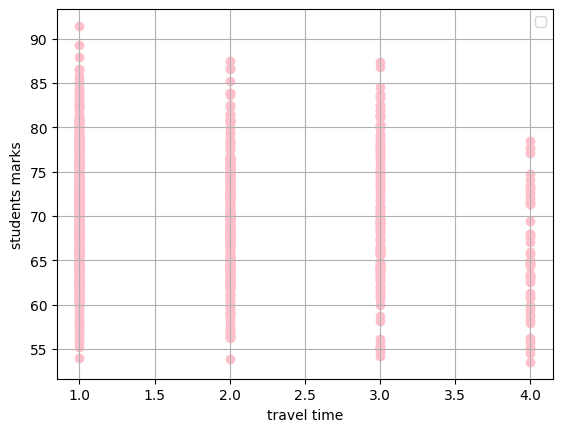

In [15]:
plt.scatter(x_train[:, 2], y_train[:, 0], color='pink')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'travel time')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

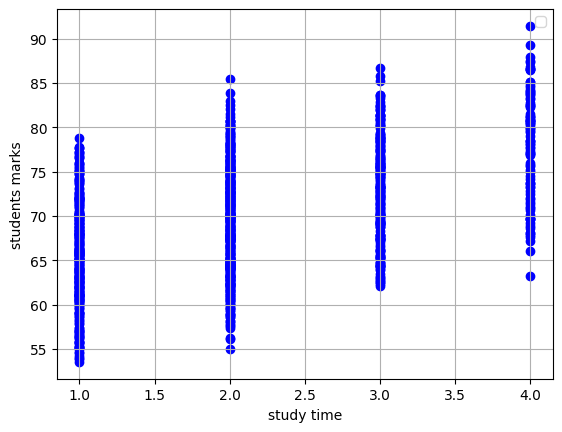

In [16]:
plt.scatter(x_train[:, 3], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'study time')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

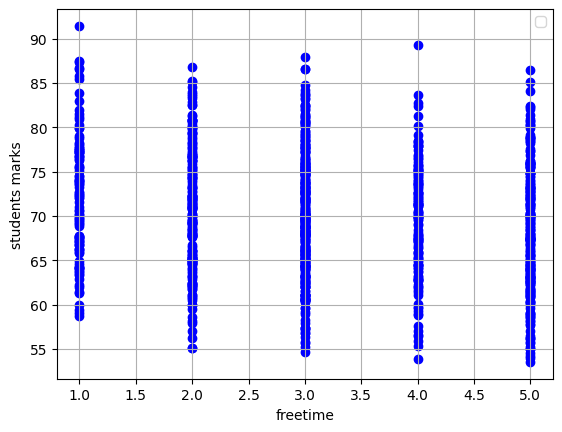

In [17]:
plt.scatter(x_train[:, 4], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'freetime')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

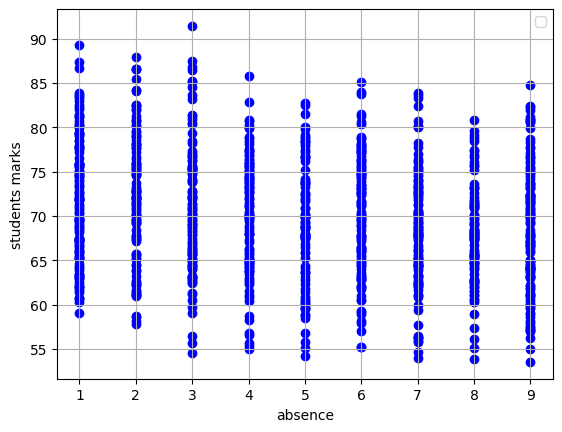

In [18]:
plt.scatter(x_train[:, 5], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'absence')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

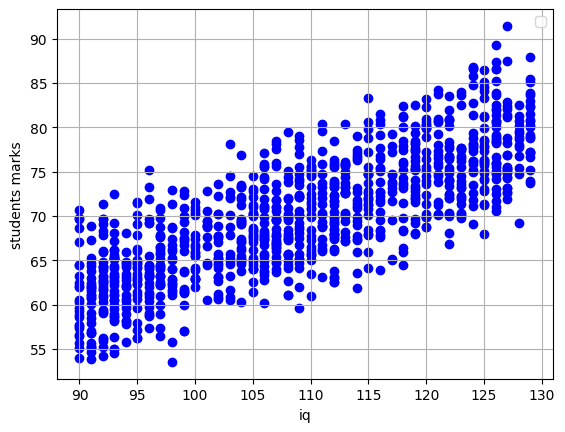

In [27]:
plt.scatter(x_train[:, 7], y_train[:, 0], color='blue')
# plt.title(f'Column 0 of x_train vs Column 0of y_train')
plt.xlabel(f'iq')
plt.ylabel(f'students marks')
plt.legend()
plt.grid(True)
plt.show()

In [54]:
# code for feature scaling
def z_score(x_train):
   # find the mean of each column/feature
    x_mean = np.mean(x_train, axis=0)
    # find the standard deviation of each column/feature
    x_std = np.std(x_train, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    x_train = (x_train - x_mean) / x_std

    return x_train,x_std,x_mean

In [68]:
# Use mean square error as cost function
def cost(x_train,y_train,w,b):
  # m = x.shape[0]

    cost_sum = 0
    for i in range(1000):
        f_wb =  (x_train[i,:].reshape(8, 1)).dot(w) + b
        cost = (f_wb - y_train[i,0]) ** 2
        cost_sum = cost_sum + cost
    loss = (1 / (2 * 1000)) * cost_sum

    return loss

In [69]:
import numpy as np

# computing gradient descent
def gradient_descent(x_train, y_train, w, b, iterations=10000, alpha=9e-7, m=100):
    for iter in range(iterations):
        # Calculate the gradient
        dj_db = 0
        dj_dw = np.zeros_like(w)
        for i in range(m):
            f_wb = np.dot(w, (x_train[i,:].reshape(8, 1))) + b
            dj_dw_i = (f_wb - y_train[i]) * (x_train[i,:].reshape(8, 1))
            dj_db_i = f_wb - y_train[i]
            dj_db += dj_db_i
            dj_dw += dj_dw_i

        dj_dw = dj_dw / m
        dj_db = dj_db / m

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

    return w, b

In [70]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(8,1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('/content/Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('/content/Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
# ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

ValueError: shapes (8,1) and (8,1) not aligned: 1 (dim 1) != 8 (dim 0)